In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import requests
#from bs4 import BeautifulSoup
        

***disclaimer:***

--------------------------------------------------------------------------------------------------------------------------------------------
The text below, data and information are not mine, the analysis of the data and the highlights obteined are just my personal interpretation and should not be taken as a fact or the truth, part of the data and information can be incomplet or misinterpreted.
Any sugestion, don't be afraid to contact me at arturoale1994@gmail.com
--------------------------------------------------------------------------------------------------------------------------------------------

**Context**
The basic GISS temperature analysis scheme was defined in the late 1970s by James Hansen when a method of estimating global temperature change was needed for comparison with one-dimensional global climate models. The analysis method was fully documented in Hansen and Lebedeff (1987). Several papers describing updates to the analysis followed over the following decades, most recently that of Hansen et al. (2010), as well as the uncertainty quantification of Lenssen et al. (2019).

For further details, please see the GISTEMP Background, History, and References pages. We also maintain a running record of modifications made to the analysis on our Updates to Analysis page.

The GISTEMP analysis is updated regularly. Graphs and tables are posted around the middle of every month using the latest GHCN and ERSST data. The update incorporates reports for the previous month as well as late reports and corrections for earlier months.

Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies (Land-Ocean Temperature Index, L-OTI). The following are plain-text files in tabular format of temperature anomalies, i.e. deviations from the corresponding 1951-1980 means.




GISTEMP Team, 2023: GISS Surface Temperature Analysis (GISTEMP), version 4. NASA Goddard Institute for Space Studies. Dataset accessed 2023-02-06 at data.giss.nasa.gov/gistemp/.
Lenssen, N., G. Schmidt, J. Hansen, M. Menne, A. Persin, R. Ruedy, and D. Zyss, 2019: Improvements in the GISTEMP uncertainty model. J. Geophys. Res. Atmos., 124, no. 12, 6307-6326,doi:10.1029/2018JD029522.
GISS Analysis

In [27]:
file='monthly_temperature.csv'

In [28]:
m_temp=pd.read_csv(file)

In [29]:
m_temp.head(5)

,Year,Month,Temperature
0,1880,1,-0.36
1,1881,1,-0.31
2,1882,1,0.26
3,1883,1,-0.58
4,1884,1,-0.17


In [30]:
m_temp.columns

Index(['Year', 'Month', 'Temperature'], dtype='object')

In [31]:
m_temp.dtypes

Year             int64
Month            int64
Temperature    float64
dtype: object

In [32]:
m_temp.describe()

,Year,Month,Temperature
count,1716.000000,1716.000000,1716.000000
mean,1951.000000,6.500000,0.086603
std,41.291568,3.453059,0.475834
min,1880.000000,1.000000,-1.510000
25%,1915.000000,3.750000,-0.240000
50%,1951.000000,6.500000,0.000000
75%,1987.000000,9.250000,0.320000
max,2022.000000,12.000000,1.940000


In [33]:
m_temp.sort_values(by = ['Year', 'Month'])

,Year,Month,Temperature
0,1880,1,-0.36
143,1880,2,-0.51
286,1880,3,-0.23
429,1880,4,-0.30
572,1880,5,-0.06
...,...,...,...
1143,2022,8,1.16
1286,2022,9,1.15
1429,2022,10,1.31
1572,2022,11,1.08


In [34]:
grouped = m_temp.groupby(['Year'])['Temperature'].mean()

In [70]:
result = pd.DataFrame({'Year': grouped.index, 'Mean_Temperature': grouped.values})
print(result)

     Year  Mean_Temperature
0    1880         -0.289167
1    1881         -0.177500
2    1882         -0.214167
3    1883         -0.285000
4    1884         -0.428333
..    ...               ...
138  2018          1.030833
139  2019          1.205000
140  2020          1.350000
141  2021          1.138333
142  2022          1.155833

[143 rows x 2 columns]


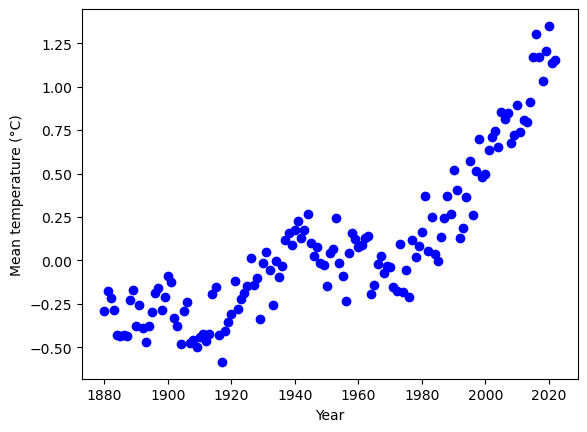

In [73]:
x = result.Year
y = result.Mean_Temperature
plt.scatter(x, y, color='blue')
plt.xlabel('Year')
plt.ylabel('Mean temperature (°C)')

plt.show()

In the above image, we can see that temperatures have been increasing over the last century. As a result, we can track which month has the highest temperature each year and the lowest in order to try and predict which months of 2023 will be the hottest and coldest.

In [37]:
grouped_month = m_temp.groupby(['Year'])['Temperature'].idxmax()
max_result = m_temp.loc[grouped_month]
max_result=max_result[['Year', 'Month', 'Temperature']]


then, we can see in a histogram, which monhts are more frecuent to have a rise in the temperature

<AxesSubplot:xlabel='Month', ylabel='Frequency'>

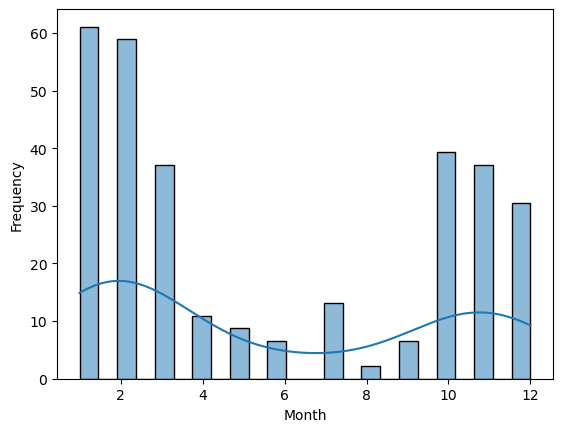

In [105]:
rating=m_temp.loc[grouped_month]
rating=rating[['Year','Month']]
sns.histplot(rating, x='Month', stat='frequency', kde=True, bins=24)



So, looking at the histogram, we can figure that is more frecuent to have high temperatures during January-February. There is a significant increase of the temperatures from December to January, this match wiht the begining of the summer in the Southern hemisphere, and it may be realted to this fact in combination of the rise of greenhouse effect emitions in the Northern hemisphere. ***The causes of the raise of the temperatures are not treated at this moment of this project***

Now, let's wee which are the coldest month and after geting that information, we're gonna use linear regression to try a prediction of the higest temperature and compare with the real data that's already existing at the moment of the creation of this project.